# Canonical Signal

In [1]:
from PlantReactivityAnalysis.data.signal_dataset import SignalDataset
from PlantReactivityAnalysis.models.experiment import Experiment
import PlantReactivityAnalysis.models.help_experiment as he
from PlantReactivityAnalysis.config import PROCESSED_DATA_DIR
import matplotlib.pyplot as plt

## Function Definition

In [2]:
def get_class_indices(input_list):
    class_indices = {}
    for idx, value in enumerate(input_list):
        if value not in class_indices:
            class_indices[value] = []
        class_indices[value].append(idx)
    return class_indices

In [3]:
def plot_multiple_waveforms(waveforms, sample_rate=10000, labels=None, title='Waveform Comparison'):
    """
    Plots multiple waveforms on the same chart.

    :param waveforms: List of waveforms to plot.
    :param sample_rate: The sample rate of the waveforms. Default is 10000.
    :param labels: List of labels for the waveforms. If None, default labels are used.
    :param title: The title of the plot.
    """
    assert len(waveforms) > 0, "No waveforms provided for plotting"
    
    # Use default labels if none are provided
    if labels is None:
        labels = [f'Waveform {i+1}' for i in range(len(waveforms))]

    assert len(waveforms) == len(labels), "Number of waveforms and labels must match"

    # Generate a time axis
    time_axis = [i / sample_rate for i in range(len(waveforms[0]))]

    # Plot each waveform
    for i, wave in enumerate(waveforms):
        plt.plot(time_axis, wave, label=labels[i])

    # Adding labels and title
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.title(title)

    # Show legend
    plt.legend()

    # Display the plot
    plt.show()

## Data Import

In [4]:
norm_letters_signal_dataset_path = r"../data\interim\norm_letters_signal_dataset.pkl"
signal_dataset= SignalDataset.load(norm_letters_signal_dataset_path)

In [5]:
avg= signal_dataset.calculate_average_duration()
print(avg)

11.016870202622153


In [6]:
signal_dataset.resample_signals(target_duration= int(avg))

## Plant Signal

In [8]:
avg_signal= signal_dataset.average_signal(indexes= signal_dataset.features.index.tolist())

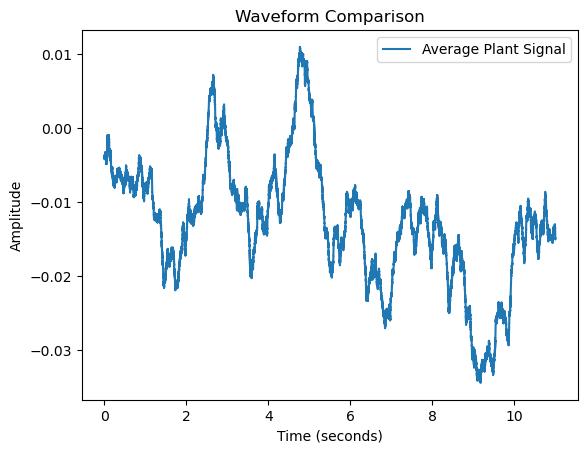

In [9]:
plot_multiple_waveforms(waveforms= [avg_signal], labels=['Average Plant Signal'])

## RQ1

In [10]:
rq1_signal_dataset= signal_dataset.copy()
rq1_indexes, rq1_targets= ped.get_indexes_and_targets_by_rq(1, rq1_signal_dataset.features)
rq1_signal_dataset.features= rq1_signal_dataset.features.iloc[rq1_indexes]
rq1_signal_dataset.features.reset_index(drop=True, inplace=True)

NameError: name 'ped' is not defined

In [ ]:
rq1_classes_indices= get_class_indices(rq1_targets)

In [ ]:
avg_eurythmy= signal_dataset.average_signal(rq1_classes_indices[1])
avg_control= signal_dataset.average_signal(rq1_classes_indices[0])

In [ ]:
plot_multiple_waveforms(waveforms= [avg_eurythmy, avg_control], labels=['Eurythmy','Control'], title='Canonical Comparison')

### Removing constant signals (noise?)

In [ ]:
rq1_signal_dataset.remove_constant_signals()

In [ ]:
rq1_signal_dataset.features.reset_index(drop=True, inplace=True)
rq1_indexes, rq1_targets= ped.get_indexes_and_targets_by_rq(1, rq1_signal_dataset.features)
rq1_signal_dataset.features= rq1_signal_dataset.features.iloc[rq1_indexes]
rq1_signal_dataset.features.reset_index(drop=True, inplace=True)

In [ ]:
rq1_classes_indices= get_class_indices(rq1_targets)

In [ ]:
avg_eurythmy= signal_dataset.average_signal(rq1_classes_indices[1])
avg_control= signal_dataset.average_signal(rq1_classes_indices[0])

In [ ]:
plot_multiple_waveforms(waveforms= [avg_eurythmy, avg_control], labels=['Eurythmy','Control'], title='Canonical Comparison')

In [ ]:
del rq1_signal_dataset

## RQ2

In [ ]:
%%time

rq2_signal_dataset= signal_dataset.copy()
rq2_indexes, rq2_targets= ped.get_indexes_and_targets_by_rq(2, rq2_signal_dataset.features)
rq2_signal_dataset.features= rq2_signal_dataset.features.iloc[rq2_indexes]
rq2_signal_dataset.features.reset_index(drop=True, inplace=True)

rq2_classes_indices= get_class_indices(rq2_targets)
avg_A= signal_dataset.average_signal(rq2_classes_indices[0])
avg_G= signal_dataset.average_signal(rq2_classes_indices[1])
avg_D= signal_dataset.average_signal(rq2_classes_indices[2])

plot_multiple_waveforms(waveforms= [avg_A, avg_G, avg_D], labels=['A','G','D'], title='Canonical Comparison Letters')

### Removing constant signals (noise?)

In [ ]:
rq2_signal_dataset.remove_constant_signals()

rq2_signal_dataset.features.reset_index(drop=True, inplace=True)
rq2_indexes, rq2_targets= ped.get_indexes_and_targets_by_rq(2, rq2_signal_dataset.features)
rq2_signal_dataset.features= rq2_signal_dataset.features.iloc[rq2_indexes]
rq2_signal_dataset.features.reset_index(drop=True, inplace=True)

rq2_classes_indices= get_class_indices(rq2_targets)
avg_A= signal_dataset.average_signal(rq2_classes_indices[0])
avg_G= signal_dataset.average_signal(rq2_classes_indices[1])
avg_D= signal_dataset.average_signal(rq2_classes_indices[2])

plot_multiple_waveforms(waveforms= [avg_A, avg_G, avg_D], labels=['A','G','D'], title='Canonical Comparison Letters')

In [ ]:
del rq2_signal_dataset

## RQ4

In [ ]:
%%time

rq5_signal_dataset= signal_dataset.copy()
rq5_indexes, rq5_targets= ped.get_indexes_and_targets_by_rq(5, rq5_signal_dataset.features)
rq5_signal_dataset.features= rq5_signal_dataset.features.iloc[rq5_indexes]
rq5_signal_dataset.features.reset_index(drop=True, inplace=True)

rq5_classes_indices= get_class_indices(rq5_targets)
avg_1= signal_dataset.average_signal(rq5_classes_indices[0])
avg_2= signal_dataset.average_signal(rq5_classes_indices[1])
avg_3= signal_dataset.average_signal(rq5_classes_indices[2])

plot_multiple_waveforms(waveforms= [avg_1, avg_2, avg_3], labels=['salad','tomato','basil'],
                        title='Canonical Comparison of Plants')

### Removing constant signals (noise?)

In [ ]:
rq5_signal_dataset.remove_constant_signals()

rq5_signal_dataset.features.reset_index(drop=True, inplace=True)
rq5_indexes, rq5_targets= ped.get_indexes_and_targets_by_rq(3, rq5_signal_dataset.features)
rq5_signal_dataset.features= rq5_signal_dataset.features.iloc[rq5_indexes]
rq5_signal_dataset.features.reset_index(drop=True, inplace=True)

rq5_classes_indices= get_class_indices(rq5_targets)
avg_1= signal_dataset.average_signal(rq5_classes_indices[0])
avg_2= signal_dataset.average_signal(rq5_classes_indices[1])
avg_3= signal_dataset.average_signal(rq5_classes_indices[2])

plot_multiple_waveforms(waveforms= [avg_1, avg_2, avg_3], labels=['salad','tomato','basil'],
                        title='Canonical Comparison of Plants')